In [2]:
## importing pandas library
import pandas as pd
df = pd.read_csv('TESLA-tweets-2021-05-21-to-2021-05-20.csv', parse_dates=True)

***About Data***

Data consists of Tesla related tweets from 21/04/2021 to 21/05/2021.

Data is in csv form.

Data has 59,025 tweets.

***Note: More data can be collected to improve the results.***

In [3]:
df.head()

,date,content,username
0,2021-05-20 23:59:35+00:00,#Tesla #ElonMusk Tesla Roadster Gen 2 vs. Gen ...,eStream_Studios
1,2021-05-20 23:59:18+00:00,@lorakolodny If you ever had the opportunity t...,JohnNapieralski
2,2021-05-20 23:59:04+00:00,@elonmusk apply your spaceX thruster to the #A...,GreatEverton
3,2021-05-20 23:58:57+00:00,#Tesla's Solar Roof will play a role in #Bitco...,philipmak
4,2021-05-20 23:58:48+00:00,Really getting places with The Saurian Rangers...,AuthJamesFowler


In [4]:
df.shape
## There are 59,025 tweets with 3 columns

(59025, 3)

In [5]:
## importing necessary NLP libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re
import matplotlib.pyplot as plt

In [6]:
## Module to remove urls
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', str(text))

df['content'] = df.content.map(lambda x: remove_url(x))

In [7]:
## Module to remove mentions in tweet
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9_]+', '', text)

df['content'] = df.content.map(lambda x: remove_mentions(x))

In [8]:
## Removing hastags
def remove_hashtags(text):
    return re.sub(r'#[A-Za-z0-9_]+', '', str(text))

df['content'] = df.content.map(lambda x: remove_hashtags(x))

In [9]:
## removing extra whitespaces
def remove_whitespace(text):
    return re.sub(' +', ' ',text)

df['content'] = df.content.map(lambda x: remove_whitespace(x))

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## adding few stock related words to Vader Dictionary
## words along with sentiment score are added

analyzer = SentimentIntensityAnalyzer()

new_words = {
    'bear':-3.0,
    'bull':3.0
}

analyzer.lexicon.update(new_words)

In [11]:
emptyline = []
for row in df.content:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
    
df_sentiment = pd.DataFrame(emptyline)
df_sentiment.head()

,neg,neu,pos,compound
0,0.000,0.938,0.062,0.3182
1,0.104,0.841,0.055,-0.3612
2,0.000,0.960,0.040,0.3182
3,0.000,0.821,0.179,0.3400
4,0.000,0.825,0.175,0.1779


In [12]:
df2 = pd.concat([df.reset_index(drop = True), df_sentiment], axis = 1)
df2.head()

,date,content,username,neg,neu,pos,compound
0,2021-05-20 23:59:35+00:00,Tesla Roadster Gen 2 vs. Gen 1: See how much ...,eStream_Studios,0.000,0.938,0.062,0.3182
1,2021-05-20 23:59:18+00:00,"If you ever had the opportunity to drive a , ...",JohnNapieralski,0.104,0.841,0.055,-0.3612
2,2021-05-20 23:59:04+00:00,apply your spaceX thruster to the movements a...,GreatEverton,0.000,0.960,0.040,0.3182
3,2021-05-20 23:58:57+00:00,'s Solar Roof will play a role in Mining in th...,philipmak,0.000,0.821,0.179,0.3400
4,2021-05-20 23:58:48+00:00,Really getting places with The Saurian Rangers...,AuthJamesFowler,0.000,0.825,0.175,0.1779


In [13]:
df2.reset_index(drop = True, inplace = True)

In [14]:
import numpy as np

## Labelling tweets
## 2 ---> positive sentiment
## 0 ---> neutral sentiment
## 1 ---> negative sentiment

df2['sentiment'] = np.nan
for index in range(len(df2.compound)):
    if df2.compound[index] < 0.0:
        df2.sentiment[index] = 1
    elif df2.compound[index] > 0.0:
        df2.sentiment[index] = 2
    else:
        df2.sentiment[index] = 0
            
df2.head() 

<ipython-input-14-cd5032d58b95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sentiment[index] = 2
<ipython-input-14-cd5032d58b95>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sentiment[index] = 1
<ipython-input-14-cd5032d58b95>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sentiment[index] = 0


,date,content,username,neg,neu,pos,compound,sentiment
0,2021-05-20 23:59:35+00:00,Tesla Roadster Gen 2 vs. Gen 1: See how much ...,eStream_Studios,0.000,0.938,0.062,0.3182,2.0
1,2021-05-20 23:59:18+00:00,"If you ever had the opportunity to drive a , ...",JohnNapieralski,0.104,0.841,0.055,-0.3612,1.0
2,2021-05-20 23:59:04+00:00,apply your spaceX thruster to the movements a...,GreatEverton,0.000,0.960,0.040,0.3182,2.0
3,2021-05-20 23:58:57+00:00,'s Solar Roof will play a role in Mining in th...,philipmak,0.000,0.821,0.179,0.3400,2.0
4,2021-05-20 23:58:48+00:00,Really getting places with The Saurian Rangers...,AuthJamesFowler,0.000,0.825,0.175,0.1779,2.0


In [15]:
df2.sentiment.value_counts()  ## data is highly imbalanced

2.0    26949
0.0    20609
1.0    11467
Name: sentiment, dtype: int64

<AxesSubplot:>

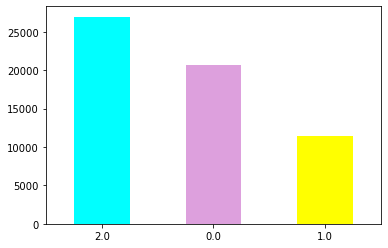

In [16]:
results = df2.sentiment.value_counts()
results.plot(kind = 'bar', rot = 0,  color = ['cyan','plum','yellow'])

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59025 entries, 0 to 59024
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       59025 non-null  object 
 1   content    59025 non-null  object 
 2   username   59025 non-null  object 
 3   neg        59025 non-null  float64
 4   neu        59025 non-null  float64
 5   pos        59025 non-null  float64
 6   compound   59025 non-null  float64
 7   sentiment  59025 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.6+ MB


In [18]:
df2.drop_duplicates(keep = 'first', inplace = True)
df2.reset_index(drop = True, inplace = False)
df2.shape

(59021, 8)

In [19]:
df2['date'] = pd.DatetimeIndex(df2.date)

df2.head()

,date,content,username,neg,neu,pos,compound,sentiment
0,2021-05-20 23:59:35+00:00,Tesla Roadster Gen 2 vs. Gen 1: See how much ...,eStream_Studios,0.000,0.938,0.062,0.3182,2.0
1,2021-05-20 23:59:18+00:00,"If you ever had the opportunity to drive a , ...",JohnNapieralski,0.104,0.841,0.055,-0.3612,1.0
2,2021-05-20 23:59:04+00:00,apply your spaceX thruster to the movements a...,GreatEverton,0.000,0.960,0.040,0.3182,2.0
3,2021-05-20 23:58:57+00:00,'s Solar Roof will play a role in Mining in th...,philipmak,0.000,0.821,0.179,0.3400,2.0
4,2021-05-20 23:58:48+00:00,Really getting places with The Saurian Rangers...,AuthJamesFowler,0.000,0.825,0.175,0.1779,2.0


In [20]:
score = df2[['date','compound']]
score.head()

,date,compound
0,2021-05-20 23:59:35+00:00,0.3182
1,2021-05-20 23:59:18+00:00,-0.3612
2,2021-05-20 23:59:04+00:00,0.3182
3,2021-05-20 23:58:57+00:00,0.3400
4,2021-05-20 23:58:48+00:00,0.1779


In [21]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59021 entries, 0 to 59024
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      59021 non-null  datetime64[ns, UTC]
 1   compound  59021 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 1.4 MB


In [22]:
score.set_index(df2['date'], inplace = True, drop = True)

## Resampling data by taking mean of the compund score for each day
score_by_day = score['compound'].resample('D').mean()
score_by_day.head()

date
2021-04-21 00:00:00+00:00    0.152314
2021-04-22 00:00:00+00:00    0.149397
2021-04-23 00:00:00+00:00    0.145819
2021-04-24 00:00:00+00:00    0.160794
2021-04-25 00:00:00+00:00    0.186266
Freq: D, Name: compound, dtype: float64

<AxesSubplot:xlabel='date'>

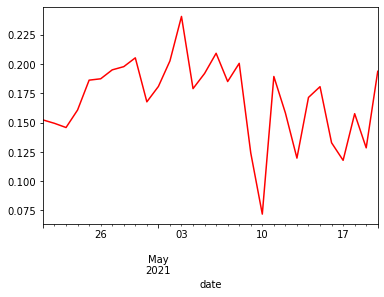

In [23]:
## ploting sentiment score for each day
score_by_day.plot(kind = 'line', color = 'r')

In [24]:
## changing tweets to lower case
df2['content'] = df2.content.apply(lambda x:' '.join(x.lower() for x in x.split()))

In [25]:
stop = stopwords.words('english')
## removing stopwords
df2['content'] = df2.content.apply(lambda x:' '.join(x for x in x.split() if x not in stop))
df2.content.head()

0    tesla roadster gen 2 vs. gen 1: see much chang...
1    ever opportunity drive , realize vehicles don’...
2    apply spacex thruster movements let’s stick sh...
3               's solar roof play role mining future.
4        really getting places saurian rangers amazon.
Name: content, dtype: object

In [26]:
df2['content'] = df2.content.str.replace('[^\w\s]','')
## keeping only letters and words
df2.content.head()

0    tesla roadster gen 2 vs gen 1 see much changed...
1    ever opportunity drive  realize vehicles dont ...
2    apply spacex thruster movements lets stick sho...
3                 s solar roof play role mining future
4         really getting places saurian rangers amazon
Name: content, dtype: object

In [27]:
df2['content'] = df2.content.apply(lambda x:' '.join([Word(word).lemmatize() for word in x.split()]))
## Lemmatizing each word
df2.content.head()

## Note: One or two letter words can also be removed from the tweets

0    tesla roadster gen 2 v gen 1 see much changed ...
1    ever opportunity drive realize vehicle dont co...
2    apply spacex thruster movement let stick short...
3                 s solar roof play role mining future
4           really getting place saurian ranger amazon
Name: content, dtype: object

In [28]:
## Importing train-test split
from sklearn.model_selection import train_test_split

In [29]:
## Importing necessary libraries for modelling
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

<b> Balancing the dataset </b>

In [30]:
df2.sentiment.value_counts()

2.0    26948
0.0    20607
1.0    11466
Name: sentiment, dtype: int64

In [31]:
## Randomly sampling 11466 instances from class 1
## This will make the dataset balanced

pos_df = df2[df2.sentiment == 2].sample(n = 11466).reset_index(drop = True)
pos_df.shape

(11466, 8)

In [32]:
## Similar procedure is applied to tweets with neutral sentiment
neu_df = df2[df2.sentiment == 0].sample(n = 11466).reset_index(drop = True)
neu_df.shape

(11466, 8)

In [33]:
## Getting all the tweets with negative sentiment
neg_df = df2[df2.sentiment == 1].reset_index(drop = True)
neg_df.shape

(11466, 8)

In [34]:
bal_df = pos_df.append(neg_df).append(neu_df).reset_index(drop = True)
bal_df.shape

## Now we have total 34,398 instances

(34398, 8)

<AxesSubplot:>

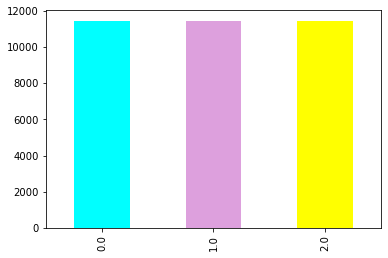

In [35]:
bal_df.sentiment.value_counts().plot(kind = 'bar', color = ['cyan','plum','yellow'])
## data is now balanced

In [36]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(bal_df['content'].values)

X = tokenizer.texts_to_sequences(bal_df['content'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  421,    9, 1787,
          23,  618, 4194,  976],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1391, 1391,   40, 1550],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  247, 3485,
         132,   16, 1033, 1624,  252,   74,   76, 1073,  145,   74,   43,
        1073,  196,   74,   67],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   14,  492,
        1103, 3689, 4962,  106,  560,    6, 4544,  848, 1034,  258,   13,
         602,

<b> Training a neural network with Embedding Layer of 5000 words </b>

In [55]:
model = Sequential()

model.add(Embedding(5000, 256, input_length = X.shape[1])) ## Embedding layer with 5000 words
model.add(Dropout(0.8)) ## Note this
model.add(LSTM(256, dropout=0.6, recurrent_dropout=0.5, activation = 'tanh'))
model.add(Dense(3, activation='sigmoid')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 37, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 1,806,083
Trainable params: 1,806,083
Non-trainable params: 0
_________________________________________________________________


In [56]:
y = pd.get_dummies(bal_df['sentiment']).values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, random_state=0)

In [58]:
## implementing with early stopping
batch_size = 150
epochs = 15

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 1,
                   validation_data = (X_test, y_test), callbacks = EarlyStopping(monitor = 'val_loss'))

Epoch 1/15
207/207 [==============================] - 135s 632ms/step - loss: 0.9686 - accuracy: 0.5028 - val_loss: 0.6768 - val_accuracy: 0.7256
Epoch 2/15
207/207 [==============================] - 131s 635ms/step - loss: 0.6660 - accuracy: 0.7212 - val_loss: 0.5306 - val_accuracy: 0.8044
Epoch 3/15
207/207 [==============================] - 125s 603ms/step - loss: 0.5295 - accuracy: 0.7961 - val_loss: 0.4713 - val_accuracy: 0.8355
Epoch 4/15
207/207 [==============================] - 126s 610ms/step - loss: 0.4541 - accuracy: 0.8363 - val_loss: 0.4460 - val_accuracy: 0.8480
Epoch 5/15
207/207 [==============================] - 125s 605ms/step - loss: 0.4080 - accuracy: 0.8584 - val_loss: 0.4319 - val_accuracy: 0.8500
Epoch 6/15
207/207 [==============================] - 125s 604ms/step - loss: 0.3756 - accuracy: 0.8710 - val_loss: 0.4351 - val_accuracy: 0.8477


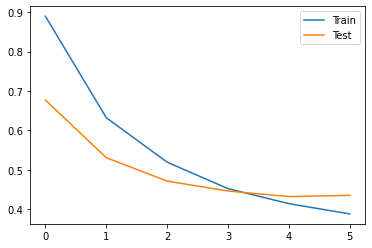

In [59]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend()
plt.show()

In [60]:
scores = model.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', scores[1])

scores = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', scores[1])

968/968 - 37s - loss: 0.3317 - accuracy: 0.8879
Train accuracy: 0.8879126310348511
108/108 - 4s - loss: 0.4351 - accuracy: 0.8477
Test accuracy: 0.8476744294166565


Train accuracy: 0.89

Test accuracy: 0.85

<b> Training another LSTM with Embedding Layer of 3000 words</b>

In [43]:
tokenizer = Tokenizer(num_words=3000, split=" ")
tokenizer.fit_on_texts(bal_df['content'].values)

X = tokenizer.texts_to_sequences(bal_df['content'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  421,    9, 1787,
          23,  618,  976],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1391,
        1391,   40, 1550],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  247,  132,
          16, 1033, 1624,  252,   74,   76, 1073,  145,   74,   43, 1073,
         196,   74,   67],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          14,  492, 1103,  106,  560,    6,  848, 1034,  258,   13,  602,
         277,   15, 1661],
    

In [44]:
model2 = Sequential()

model2.add(Embedding(3000, 256, input_length=X.shape[1]))
## No dropout after embedding layer
model2.add(LSTM(256, dropout=0.6, recurrent_dropout=0.5, activation = 'tanh'))
model2.add(Dense(3, activation='sigmoid')) 

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 36, 256)           768000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 1,294,083
Trainable params: 1,294,083
Non-trainable params: 0
_________________________________________________________________


In [45]:
y = pd.get_dummies(bal_df['sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, random_state=0)

In [46]:
## implementing with early stopping
batch_size = 150
epochs = 15

history2 = model2.fit(X_train, y_train, 
                      epochs = epochs, 
                      batch_size = batch_size, verbose = 1,
                      validation_data = (X_test, y_test), 
                      callbacks = EarlyStopping(monitor = 'val_loss'))

Epoch 1/15
207/207 [==============================] - 128s 601ms/step - loss: 0.8902 - accuracy: 0.5789 - val_loss: 0.5286 - val_accuracy: 0.8087
Epoch 2/15
207/207 [==============================] - 120s 577ms/step - loss: 0.4643 - accuracy: 0.8309 - val_loss: 0.4793 - val_accuracy: 0.8407
Epoch 3/15
207/207 [==============================] - 118s 571ms/step - loss: 0.4031 - accuracy: 0.8558 - val_loss: 0.4764 - val_accuracy: 0.8360
Epoch 4/15
207/207 [==============================] - 118s 568ms/step - loss: 0.3890 - accuracy: 0.8631 - val_loss: 0.4863 - val_accuracy: 0.8381


In [47]:
scores = model2.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', scores[1])

scores = model2.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', scores[1])

968/968 - 31s - loss: 0.3491 - accuracy: 0.8788
Train accuracy: 0.8788358569145203
108/108 - 3s - loss: 0.4863 - accuracy: 0.8381
Test accuracy: 0.838081419467926


<b> The above model has similar training accuracy like the first model</b>

<b> Training another LSTM with Embedding Layer of 3000 words but using L2 regularization</b>

In [48]:
tokenizer = Tokenizer(num_words = 3000, split=" ")
tokenizer.fit_on_texts(bal_df['content'].values)

X = tokenizer.texts_to_sequences(bal_df['content'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  421,    9, 1787,
          23,  618,  976],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1391,
        1391,   40, 1550],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  247,  132,
          16, 1033, 1624,  252,   74,   76, 1073,  145,   74,   43, 1073,
         196,   74,   67],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          14,  492, 1103,  106,  560,    6,  848, 1034,  258,   13,  602,
         277,   15, 1661],
    

In [49]:
model3 = Sequential()

model3.add(Embedding(3000, 256, input_length=X.shape[1]))
## No dropout here
model3.add(LSTM(256, dropout=0.6, recurrent_dropout=0.5, activation = 'tanh',kernel_regularizer = 'l2'))
model3.add(Dense(3, activation='sigmoid',kernel_regularizer = 'l2')) 

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 36, 256)           768000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 1,294,083
Trainable params: 1,294,083
Non-trainable params: 0
_________________________________________________________________


In [50]:
y = pd.get_dummies(bal_df['sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, random_state=0)

In [51]:
## implementing with early stopping
batch_size = 150
epochs = 15

history3 = model3.fit(X_train, y_train, 
                      epochs = epochs, 
                      batch_size = batch_size, verbose = 1,
                      validation_data = (X_test, y_test), 
                      callbacks = EarlyStopping(monitor = 'val_loss'))

Epoch 1/15
207/207 [==============================] - 117s 547ms/step - loss: 2.1761 - accuracy: 0.4857 - val_loss: 0.8306 - val_accuracy: 0.6096
Epoch 2/15
207/207 [==============================] - 111s 538ms/step - loss: 0.7870 - accuracy: 0.6426 - val_loss: 0.6703 - val_accuracy: 0.7724
Epoch 3/15
207/207 [==============================] - 112s 539ms/step - loss: 0.6210 - accuracy: 0.7941 - val_loss: 0.5998 - val_accuracy: 0.8055
Epoch 4/15
207/207 [==============================] - 122s 588ms/step - loss: 0.5420 - accuracy: 0.8336 - val_loss: 0.5723 - val_accuracy: 0.8238
Epoch 5/15
207/207 [==============================] - 114s 550ms/step - loss: 0.5198 - accuracy: 0.8451 - val_loss: 0.5691 - val_accuracy: 0.8314
Epoch 6/15
207/207 [==============================] - 111s 537ms/step - loss: 0.4880 - accuracy: 0.8550 - val_loss: 0.5674 - val_accuracy: 0.8285
Epoch 7/15
207/207 [==============================] - 112s 543ms/step - loss: 0.4702 - accuracy: 0.8616 - val_loss: 0.5565 -

In [52]:
scores = model3.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', scores[1])

scores = model3.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', scores[1])

968/968 - 30s - loss: 0.4303 - accuracy: 0.8784
Train accuracy: 0.8784482479095459
108/108 - 3s - loss: 0.5695 - accuracy: 0.8256
Test accuracy: 0.8255813717842102


<b> This model performed slightly worse than the first two models. (Maybe because of regularization)</b>

<b> Training another LSTM with Embedding Layer of 5000 words but using L2 regularization</b>

In [53]:
tokenizer = Tokenizer(num_words = 5000, split=" ")
tokenizer.fit_on_texts(bal_df['content'].values)

X = tokenizer.texts_to_sequences(bal_df['content'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  421,    9, 1787,
          23,  618, 4194,  976],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1391, 1391,   40, 1550],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  247, 3485,
         132,   16, 1033, 1624,  252,   74,   76, 1073,  145,   74,   43,
        1073,  196,   74,   67],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   14,  492,
        1103, 3689, 4962,  106,  560,    6, 4544,  848, 1034,  258,   13,
         602,

In [54]:
model4 = Sequential()

model4.add(Embedding(5000, 256, input_length=X.shape[1]))
model4.add(LSTM(256, dropout=0.6, recurrent_dropout=0.5, activation = 'tanh',kernel_regularizer = 'l2'))
model4.add(Dense(3, activation='sigmoid',kernel_regularizer = 'l2')) 

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 37, 256)           1280000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 1,806,083
Trainable params: 1,806,083
Non-trainable params: 0
_________________________________________________________________


In [55]:
y = pd.get_dummies(bal_df['sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, random_state=0)

In [56]:

batch_size = 150
epochs = 15

history4 = model4.fit(X_train, y_train, 
                      epochs = epochs, 
                      batch_size = batch_size, verbose = 1,
                      validation_data = (X_test, y_test),
                      callbacks = EarlyStopping(monitor = 'val_loss'))

Epoch 1/15
207/207 [==============================] - 127s 589ms/step - loss: 2.1822 - accuracy: 0.4902 - val_loss: 0.8055 - val_accuracy: 0.6456
Epoch 2/15
207/207 [==============================] - 116s 562ms/step - loss: 0.7370 - accuracy: 0.6989 - val_loss: 0.6051 - val_accuracy: 0.8015
Epoch 3/15
207/207 [==============================] - 117s 564ms/step - loss: 0.5392 - accuracy: 0.8329 - val_loss: 0.5635 - val_accuracy: 0.8311
Epoch 4/15
207/207 [==============================] - 120s 578ms/step - loss: 0.4854 - accuracy: 0.8625 - val_loss: 0.5395 - val_accuracy: 0.8439
Epoch 5/15
207/207 [==============================] - 117s 565ms/step - loss: 0.4414 - accuracy: 0.8783 - val_loss: 0.5289 - val_accuracy: 0.8439
Epoch 6/15
207/207 [==============================] - 116s 562ms/step - loss: 0.4204 - accuracy: 0.8880 - val_loss: 0.5328 - val_accuracy: 0.8436


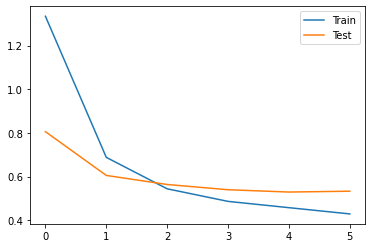

In [57]:
plt.plot(history4.history['loss'], label = 'Train')
plt.plot(history4.history['val_loss'], label = 'Test')
plt.legend()
plt.show()

In [58]:
scores = model4.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', scores[1])

scores = model4.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', scores[1])

968/968 - 32s - loss: 0.3860 - accuracy: 0.9025
Train accuracy: 0.9024807810783386
108/108 - 4s - loss: 0.5328 - accuracy: 0.8436
Test accuracy: 0.8436046242713928


<b> This model overfits the training data</b>

## INFERENCES:

The best model is the first model